In [1]:
import os 
import cv2
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Cover image location
cover_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset Cover Images"
cover_grey_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset Cover Images Greyscale"
lsb_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset LSB"
lsbg_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset LSB Greyscale"

In [3]:
# Combine cover image data into the single array
cover_data = []
for i, filename in enumerate(os.listdir(cover_dir)):
    cover_image = cv2.imread(cover_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    cover_data.append([cover_image])
for i, filename in enumerate(os.listdir(cover_grey_dir)):
    cover_image = cv2.imread(cover_grey_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    cover_data.append([cover_image])
# The length of the array should be 120
print(len(cover_data))

120


In [4]:
# Combine stego image data into the single array
stego_data = []
for i, filename in enumerate(os.listdir(lsb_dir)):
    stego_image = cv2.imread(lsb_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    stego_data.append([stego_image])
for i, filename in enumerate(os.listdir(lsbg_dir)):
    stego_image = cv2.imread(lsbg_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    stego_data.append([stego_image])
# The length of the array should be 120
print(len(stego_data))

120


In [5]:
# Combine cover and stego images with corresponding labels 
labeled_data = []
for instance in cover_data:
    labeled_data.append([instance, "cover"])
for instance in stego_data:
    labeled_data.append([instance, "stego"])
len(labeled_data)

240

Text(0.5, 1.0, 'cover')

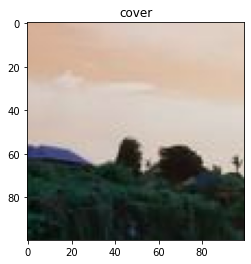

In [6]:
plt.imshow(np.array(labeled_data[1][0]).reshape(100,100,3))
plt.title(labeled_data[0][1])

In [7]:
# Separate labels from data
X = []
Y = []
for img, label in labeled_data:
    X.append(img)
    Y.append(label)

<AxesSubplot:ylabel='count'>

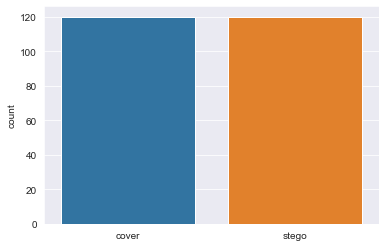

In [8]:
sns.set_style('darkgrid')
sns.countplot(x = Y)

In [9]:
# Training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [16]:
x_train = np.array(x_train, dtype="object")
y_train = np.array(y_train, dtype="object")
x_test = np.array(x_test, dtype="object")
y_test = np.array(y_test, dtype="object")

ValueError: could not broadcast input array from shape (100,100,3) into shape (100,100)

In [ ]:
sns.countplot(x = y_train)

In [ ]:
sns.countplot(x = y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(100,100,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))